In [1]:
%matplotlib inline
import pandas as pd; pd.set_option('display.max_columns', None)
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("data/report_orders.csv")
pop = pd.read_csv("data/population.csv")
df.head()

,amazon_order_id,purchase_date,order_status,order_total,currency_code,buyer_name,is_fba,do_not_solicit,add_name,add_line_1,add_line_2,add_city,add_state,add_postal,add_country,add_phone,shipment_level,shipment_datetime,shipment_delivery_datetime,number_items,total_item_quantity,skus,asins,order_notes,buyer_email,buyer_opted_out,repeat_buyer,emails_sent,buyer_first_name,buyer_last_name
0,112-9520688-0214660,2020-12-13 04:04 PM PST,Returned,32.61,USD,NOT_AVAILABLE,1,0,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,BUFFALO,NY,14221-5812,US,NOT_AVAILABLE,Expedited,2020-12-15 11:59 PM PST,2020-12-17 11:59 PM PST,1,1,2B-97HE-0LXQ,B08CSKBQVC,NaN,k717f9js0ctgdf4@marketplace.amazon.com,0.0,0.0,0,NOT_AVAILABLE,NOT_AVAILABLE
1,111-9763412-1465054,2020-12-13 07:50 PM PST,Delivered,32.66,USD,NOT_AVAILABLE,1,0,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,WALLA WALLA,WA,99362-4556,US,NOT_AVAILABLE,SecondDay,2020-12-15 11:59 PM PST,2020-12-17 11:59 PM PST,1,1,2B-97HE-0LXQ,B08CSKBQVC,NaN,r7xkc1hmm359z7d@marketplace.amazon.com,0.0,1.0,0,NOT_AVAILABLE,NOT_AVAILABLE
2,111-0582021-8828235,2020-12-13 08:42 PM PST,Delivered,31.79,USD,NOT_AVAILABLE,1,0,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,WEST CHESTER,PA,19380-4033,US,NOT_AVAILABLE,Expedited,2020-12-13 11:59 PM PST,2020-12-15 11:59 PM PST,1,1,2B-97HE-0LXQ,B08CSKBQVC,NaN,k0vbmjyzw185g0d@marketplace.amazon.com,0.0,0.0,0,NOT_AVAILABLE,NOT_AVAILABLE
3,114-5298494-2101848,2020-12-13 09:08 PM PST,Delivered,29.99,USD,NOT_AVAILABLE,1,0,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,PANAMA CITY,FL,32404-6031,US,NOT_AVAILABLE,Expedited,2020-12-15 11:59 PM PST,2020-12-17 11:59 PM PST,1,1,2B-97HE-0LXQ,B08CSKBQVC,NaN,8z1tgry607b6gg7@marketplace.amazon.com,0.0,0.0,0,NOT_AVAILABLE,NOT_AVAILABLE
4,114-7045356-6018634,2020-12-13 10:34 PM PST,Delivered,33.06,USD,NOT_AVAILABLE,1,0,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,PASADENA,CA,91105-1316,US,NOT_AVAILABLE,Expedited,2020-12-14 11:59 PM PST,2020-12-16 11:59 PM PST,1,1,2B-97HE-0LXQ,B08CSKBQVC,NaN,876z35txc7nd69h@marketplace.amazon.com,0.0,0.0,0,NOT_AVAILABLE,NOT_AVAILABLE


In [3]:
df['add_country'].value_counts()

US               5321
NOT_AVAILABLE      46
HK                 11
CO                  8
IL                  6
TW                  2
NG                  1
VI                  1
QA                  1
CR                  1
CL                  1
SG                  1
AU                  1
NO                  1
TH                  1
Name: add_country, dtype: int64

In [4]:
df = df[['amazon_order_id', 'purchase_date', 'order_total', 'add_city', 'add_state', 'add_postal',
       'add_country', 'number_items', 'total_item_quantity', 'asins','repeat_buyer']]

In [5]:
df = df.rename(columns={"asins": "Product"})


In [6]:
df['Product'] = df['Product'].replace({'B08CSKBQVC': 'Rainforest', 'B08MWVS7T7': 'Floral', 'B08CSKBQVC B08MWVS7T7': 'Both'})

In [7]:
df.loc[df['add_state'].str.contains('Texas'), 'add_state'] = "TX"
df.loc[df['add_state'].str.contains('New York'), 'add_state'] = "NY"
df.loc[df['add_state'].str.contains('CALIFORNIA'), 'add_state'] = "CA"

df.loc[df['add_state'].str.contains('Florida'), 'add_state'] = "FL"
df.loc[df['add_state'].str.contains('California'), 'add_state'] = "CA"
df.loc[df['add_state'].str.contains('FLORIDA'), 'add_state'] = "FL"

df.loc[df['add_state'].str.contains('TEXAS'), 'add_state'] = "TX"
df.loc[df['add_state'].str.contains('Mi'), 'add_state'] = "MI"
df.loc[df['add_state'].str.contains('Colorado'), 'add_state'] = "CO"

df.loc[df['add_state'].str.contains('OHIO'), 'add_state'] = "OH"
df.loc[df['add_state'].str.contains('WASHINGTON'), 'add_state'] = "WA"
df.loc[df['add_state'].str.contains('New york'), 'add_state'] = "NY"

df.loc[df['add_state'].str.contains('NEW YORK'), 'add_state'] = "NY"
df.loc[df['add_state'].str.contains('Illinois'), 'add_state'] = "IL"
df.loc[df['add_state'].str.contains('MICHIGAN'), 'add_state'] = "MI"

df.loc[df['add_state'].str.contains('Pa'), 'add_state'] = "PA"
df.loc[df['add_state'].str.contains('ct'), 'add_state'] = "CT"
df.loc[df['add_state'].str.contains('Wi'), 'add_state'] = "WI"

df.loc[df['add_state'].str.contains('New Jersey'), 'add_state'] = "NJ"
df.loc[df['add_state'].str.contains('Fl'), 'add_state'] = "FL"
df.loc[df['add_state'].str.contains('Nc'), 'add_state'] = "NC"

df.loc[df['add_state'].str.contains('Nj'), 'add_state'] = "NJ"
df.loc[df['add_state'].str.contains('Ohio'), 'add_state'] = "OH"
df.loc[df['add_state'].str.contains('UTAH'), 'add_state'] = "UT"
df.loc[df['add_state'].str.contains('Utah'), 'add_state'] = "UT"
df.loc[df['add_state'].str.contains('Tennessee'), 'add_state'] = "TN"
df.loc[df['add_state'].str.contains('Massachusetts'), 'add_state'] = "MA"
df.loc[df['add_state'].str.contains('Va'), 'add_state'] = "VA"
df.loc[df['add_state'].str.contains('MINNESOTA'), 'add_state'] = "MN"
df.loc[df['add_state'].str.contains('Tx'), 'add_state'] = "TX"

df.loc[df['add_state'].str.contains('Ca'), 'add_state'] = "CA"
df.loc[df['add_state'].str.contains('ca'), 'add_state'] = "CA"
df.loc[df['add_state'].str.contains('Washington'), 'add_state'] = "WA"
df.loc[df['add_state'].str.contains('fl'), 'add_state'] = "FL"
df.loc[df['add_state'].str.contains('Oregon'), 'add_state'] = "OR"
df.loc[df['add_state'].str.contains('WISCONSIN'), 'add_state'] = "WI"
df.loc[df['add_state'].str.contains('Wa'), 'add_state'] = "WA"
df.loc[df['add_state'].str.contains('Ny'), 'add_state'] = "NY"
df.loc[df['add_state'].str.contains('MAINE'), 'add_state'] = "ME"

df.loc[df['add_state'].str.contains('ARIZONA'), 'add_state'] = "AZ"
df.loc[df['add_state'].str.contains('Arizona'), 'add_state'] = "AZ"
df.loc[df['add_state'].str.contains('ny'), 'add_state'] = "NY"
df.loc[df['add_state'].str.contains('Co'), 'add_state'] = "CO"
df.loc[df['add_state'].str.contains('Indiana'), 'add_state'] = "IN"
df.loc[df['add_state'].str.contains('Iowa'), 'add_state'] = "IA"
df.loc[df['add_state'].str.contains('COLORADO'), 'add_state'] = "CO"
df.loc[df['add_state'].str.contains('Maryland'), 'add_state'] = "MD"
df.loc[df['add_state'].str.contains('Ma'), 'add_state'] = "MA"
df.loc[df['add_state'].str.contains('tx'), 'add_state'] = "TX"
df.loc[df['add_state'].str.contains('Ut'), 'add_state'] = "UT"


In [8]:
df = df.rename(columns={"add_state": "Abbrev"})

In [9]:
usa_df = df.loc[df['add_country'] == 'US']
usa_df.head(59)

,amazon_order_id,purchase_date,order_total,add_city,Abbrev,add_postal,add_country,number_items,total_item_quantity,Product,repeat_buyer
0,112-9520688-0214660,2020-12-13 04:04 PM PST,32.61,BUFFALO,NY,14221-5812,US,1,1,Rainforest,0.0
1,111-9763412-1465054,2020-12-13 07:50 PM PST,32.66,WALLA WALLA,WA,99362-4556,US,1,1,Rainforest,1.0
2,111-0582021-8828235,2020-12-13 08:42 PM PST,31.79,WEST CHESTER,PA,19380-4033,US,1,1,Rainforest,0.0
3,114-5298494-2101848,2020-12-13 09:08 PM PST,29.99,PANAMA CITY,FL,32404-6031,US,1,1,Rainforest,0.0
4,114-7045356-6018634,2020-12-13 10:34 PM PST,33.06,PASADENA,CA,91105-1316,US,1,1,Rainforest,0.0
5,113-6338118-2538635,2020-12-14 05:21 AM PST,32.09,BROWNSBURG,IN,46112-9234,US,1,1,Rainforest,0.0
6,114-0981175-7351430,2020-12-14 05:45 AM PST,29.99,KANSAS CITY,MO,64110-1628,US,1,1,Rainforest,0.0
7,112-8562237-5146647,2020-12-14 06:01 AM PST,31.98,MAHWAH,NJ,07430-2567,US,1,1,Rainforest,0.0
8,112-1988159-4756231,2020-12-14 06:30 AM PST,31.79,TAYLOR,MI,48180-2054,US,1,1,Rainforest,0.0
9,111-9367418-0112249,2020-12-14 06:54 AM PST,32.65,BROOKLYN,NY,11209-4909,US,1,1,Rainforest,0.0


In [10]:
state_df = usa_df.groupby(by=["Abbrev"]).sum()
state_df.sort_values(by='number_items', ascending=False)

,order_total,number_items,total_item_quantity,repeat_buyer
Abbrev,,,,
CA,30642.20,967,993,84.0
NY,13608.07,433,441,45.0
FL,12382.52,401,415,35.0
TX,10869.13,333,349,20.0
WA,8439.29,262,273,20.0
...,...,...,...,...
Nevada,27.08,1,1,0.0
OREGON,24.99,1,1,0.0
Oh,32.24,1,1,0.0


In [11]:
state_df = state_df[state_df['number_items'] >= 5]
index = state_df.index
number_of_rows = len(index)
number_of_rows

52

In [12]:
state_df = pd.merge(state_df,pop,on='Abbrev',how='left')
state_df=state_df.drop([0, 1])

In [13]:
state_df['Orders per capita (100,000)'] = state_df['number_items']/state_df['Population']*1000000
state_df['Totals per capita (100,000)'] = state_df['order_total']/state_df['Population']*1000000
state_df.sort_values(by='Orders per capita (100,000)', ascending=False)

,Abbrev,order_total,number_items,total_item_quantity,repeat_buyer,State Name,Population,"Orders per capita (100,000)","Totals per capita (100,000)"
47,VT,907.24,30,31,2.0,Vermont,623989.0,48.077771,1453.935887
48,WA,8439.29,262,273,20.0,Washington,7614893.0,34.406262,1108.261140
20,MA,7260.07,228,237,23.0,Massachusetts,6892503.0,33.079420,1053.328522
7,CT,3735.57,117,120,10.0,Connecticut,3565287.0,32.816432,1047.761372
38,OR,3893.79,134,136,13.0,Oregon,4217737.0,31.770592,923.194120
6,CO,5259.67,168,173,28.0,Colorado,5758736.0,29.173069,913.337580
8,DC,609.30,19,20,1.0,District of Columbia,705749.0,26.921753,863.338099
27,MT,719.74,27,27,2.0,Montana,1068778.0,25.262496,673.423293
14,ID,1318.90,44,44,3.0,Idaho,1787065.0,24.621376,738.025757
5,CA,30642.20,967,993,84.0,California,39512223.0,24.473440,775.511922


In [14]:
df1 = df["purchase_date"].str.split("-", expand = True) 
df["Month"]= df1[1]
df["Month#"]= df1[1]

In [15]:
df.loc[df['Month'].str.contains('01'), 'Month'] = "January"
df.loc[df['Month'].str.contains('02'), 'Month'] = "February"
df.loc[df['Month'].str.contains('03'), 'Month'] = "March"
df.loc[df['Month'].str.contains('04'), 'Month'] = "April"
df.loc[df['Month'].str.contains('05'), 'Month'] = "May"
df.loc[df['Month'].str.contains('06'), 'Month'] = "June"
df.loc[df['Month'].str.contains('12'), 'Month'] = "December"

In [16]:
df.to_csv(r'data\df_cleaned.csv', index = False)
state_df.to_csv(r'data\state.csv', index = False)

In [17]:
df.dtypes

amazon_order_id         object
purchase_date           object
order_total            float64
add_city                object
Abbrev                  object
add_postal              object
add_country             object
number_items             int64
total_item_quantity      int64
Product                 object
repeat_buyer           float64
Month                   object
Month#                  object
dtype: object

In [18]:
pop

,State Name,Abbrev,Population
0,Alabama,AL,4903185
1,Alaska,AK,731545
2,Arizona,AZ,7278717
3,Arkansas,AR,3017804
4,California,CA,39512223
5,Colorado,CO,5758736
6,Connecticut,CT,3565287
7,Delaware,DE,973764
8,District of Columbia,DC,705749
9,Florida,FL,21477737


In [19]:
month_df = df.groupby(by=["Month"]).sum()



In [20]:
month_df

,order_total,number_items,total_item_quantity,repeat_buyer
Month,,,,
April,24137.48,694,726,64.0
December,7357.06,222,230,16.0
February,23626.38,644,670,56.0
January,28617.22,839,865,68.0
June,27166.05,1023,1065,50.0
March,27689.24,835,859,75.0
May,38334.16,1384,1431,120.0


In [21]:
month_df = month_df.reindex(["December", "January", "February","March", "April", "May","June"])

In [22]:
month_df = month_df.reset_index()
month_df = month_df.set_index('Month')
month_df = month_df.reset_index()
month_df

,Month,order_total,number_items,total_item_quantity,repeat_buyer
0,December,7357.06,222,230,16.0
1,January,28617.22,839,865,68.0
2,February,23626.38,644,670,56.0
3,March,27689.24,835,859,75.0
4,April,24137.48,694,726,64.0
5,May,38334.16,1384,1431,120.0
6,June,27166.05,1023,1065,50.0


In [23]:
month_df.loc[month_df['Month'].str.contains('01'), 'Month'] = "January"
month_df.loc[month_df['Month'].str.contains('02'), 'Month'] = "February"
month_df.loc[month_df['Month'].str.contains('03'), 'Month'] = "March"
month_df.loc[month_df['Month'].str.contains('04'), 'Month'] = "April"
month_df.loc[month_df['Month'].str.contains('05'), 'Month'] = "May"
month_df.loc[month_df['Month'].str.contains('06'), 'Month'] = "June"
month_df.loc[month_df['Month'].str.contains('12'), 'Month'] = "December"


In [24]:
month_df

,Month,order_total,number_items,total_item_quantity,repeat_buyer
0,December,7357.06,222,230,16.0
1,January,28617.22,839,865,68.0
2,February,23626.38,644,670,56.0
3,March,27689.24,835,859,75.0
4,April,24137.48,694,726,64.0
5,May,38334.16,1384,1431,120.0
6,June,27166.05,1023,1065,50.0


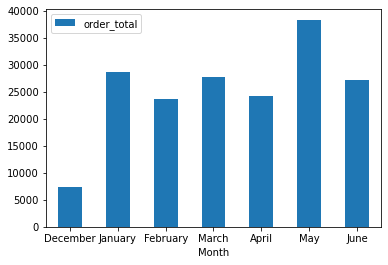

In [25]:
month_df['Month']= month_df['Month'].apply(str)

ax = month_df.plot.bar(x='Month', y='order_total', rot=0)

In [26]:
df

,amazon_order_id,purchase_date,order_total,add_city,Abbrev,add_postal,add_country,number_items,total_item_quantity,Product,repeat_buyer,Month,Month#
0,112-9520688-0214660,2020-12-13 04:04 PM PST,32.61,BUFFALO,NY,14221-5812,US,1,1,Rainforest,0.0,December,12
1,111-9763412-1465054,2020-12-13 07:50 PM PST,32.66,WALLA WALLA,WA,99362-4556,US,1,1,Rainforest,1.0,December,12
2,111-0582021-8828235,2020-12-13 08:42 PM PST,31.79,WEST CHESTER,PA,19380-4033,US,1,1,Rainforest,0.0,December,12
3,114-5298494-2101848,2020-12-13 09:08 PM PST,29.99,PANAMA CITY,FL,32404-6031,US,1,1,Rainforest,0.0,December,12
4,114-7045356-6018634,2020-12-13 10:34 PM PST,33.06,PASADENA,CA,91105-1316,US,1,1,Rainforest,0.0,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5398,114-4557145-9879435,2021-06-19 02:11 PM PDT,NaN,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,1,1,Floral,NaN,June,06
5399,112-8964536-1097055,2021-06-19 03:05 PM PDT,NaN,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,1,1,Floral,NaN,June,06
5400,111-4452161-5946602,2021-06-19 03:58 PM PDT,NaN,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,1,1,Floral,NaN,June,06
5401,112-9786763-5069819,2021-06-19 04:51 PM PDT,NaN,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,NOT_AVAILABLE,1,2,Floral,NaN,June,06


In [27]:
floral_df = df.groupby(by=["Product"]).sum()

In [28]:
floral_df

,order_total,number_items,total_item_quantity,repeat_buyer
Product,,,,
Both,14365.10,476,488,13.0
Floral,53978.69,1741,1791,160.0
Rainforest,108583.80,3424,3567,276.0


In [29]:
month_df.to_csv(r'data\month.csv', index = False)
pop.to_csv(r'data\pop.csv', index = False)

In [30]:
df["Month"]= df["Month"].astype(str)
month_df["Month"]= month_df["Month"].astype(str)

In [31]:
month_df.dtypes

Month                   object
order_total            float64
number_items             int64
total_item_quantity      int64
repeat_buyer           float64
dtype: object